# Air Quality Index Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem objective
Predict the Air Quality Index (AQI) by building an ensemble regression model that combines the strengths of several regression techniques. The project focuses on optimizing individual models and leveraging ensemble methods to achieve robust and accurate AQI predictions.

Goal: Forecast AQI trends over an extended period (days) to help stakeholders understand long-term air quality patterns.


In [ ]:
file = '/content/drive/MyDrive/ML_assignments/AIQ_data'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
# Load datasets
city_day_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/city_day.csv")
city_hour_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/city_hour.csv")
station_day_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/station_day.csv")
station_hour_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/station_hour.csv")
stations_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/stations.csv")

<ipython-input-5-1b2474d05220>:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour_df = pd.read_csv("/content/drive/MyDrive/ML_assignments/AIQ_data/station_hour.csv")


# **EDA**

In [ ]:
datasets = {
    "city_day_df": city_day_df,
    "city_hour_df": city_hour_df,
    "station_day_df": station_day_df,
    "station_hour_df": station_hour_df,
    "stations_df": stations_df
}

# Print the number of rows in each dataset
for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} records")

# The total number of records across all datasets
total_records = sum(df.shape[0] for df in datasets.values())
print(f"\nTotal number of records across all datasets: {total_records}")


city_day_df: 29531 records
city_hour_df: 707875 records
station_day_df: 108035 records
station_hour_df: 2589083 records
stations_df: 230 records

Total number of records across all datasets: 3434754


In [ ]:
# Print the number of features (columns) in each dataset
for name, df in datasets.items():
    print(f"{name}: {df.shape[1]} features (columns)")

# The total unique features across all datasets
all_columns = set().union(*[df.columns for df in datasets.values()])
print(f"\nTotal unique features across all datasets: {len(all_columns)}")

city_day_df: 16 features (columns)
city_hour_df: 16 features (columns)
station_day_df: 16 features (columns)
station_hour_df: 16 features (columns)
stations_df: 5 features (columns)

Total unique features across all datasets: 21


In [ ]:
# Display basic information about each dataset
print("City Day Dataset:",city_day_df.info(), "\n")

print("City Hour Dataset:",city_hour_df.info(), "\n")

print("Station Day Dataset:",station_day_df.info(), "\n")

print("Station Hour Dataset:",station_hour_df.info(), "\n")

print("Stations Dataset:",stations_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
City Day Dataset: None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 7078

In [ ]:
# Display the first few rows of each dataset
print("City Day Dataset Sample:",city_day_df.head(), "\n")

print("City Hour Dataset Sample:",city_hour_df.head(), "\n")

print("Station Day Dataset Sample:",station_day_df.head(), "\n")

print("Station Hour Dataset Sample:",station_hour_df.head(), "\n")

print("Stations Dataset Sample:",stations_df.head())

City Day Dataset Sample:         City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN   

City Hour Dataset Sample:         City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  4

In [ ]:
# Loop through each dataset and print summary statistics and missing values
for name, df in datasets.items():
    print(f"--- {name} ---")
    print("Summary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("="*50, "\n")


--- city_day_df ---
Summary Statistics:
             City        Date         PM2.5          PM10            NO  \
count       29531       29531  24933.000000  18391.000000  25949.000000   
unique         26        2009           NaN           NaN           NaN   
top     Ahmedabad  2020-07-01           NaN           NaN           NaN   
freq         2009          26           NaN           NaN           NaN   
mean          NaN         NaN     67.450578    118.127103     17.574730   
std           NaN         NaN     64.661449     90.605110     22.785846   
min           NaN         NaN      0.040000      0.010000      0.020000   
25%           NaN         NaN     28.820000     56.255000      5.630000   
50%           NaN         NaN     48.570000     95.680000      9.890000   
75%           NaN         NaN     80.590000    149.745000     19.950000   
max           NaN         NaN    949.990000   1000.000000    390.680000   

                 NO2           NOx           NH3           

Plotting distributions for: city_day_df


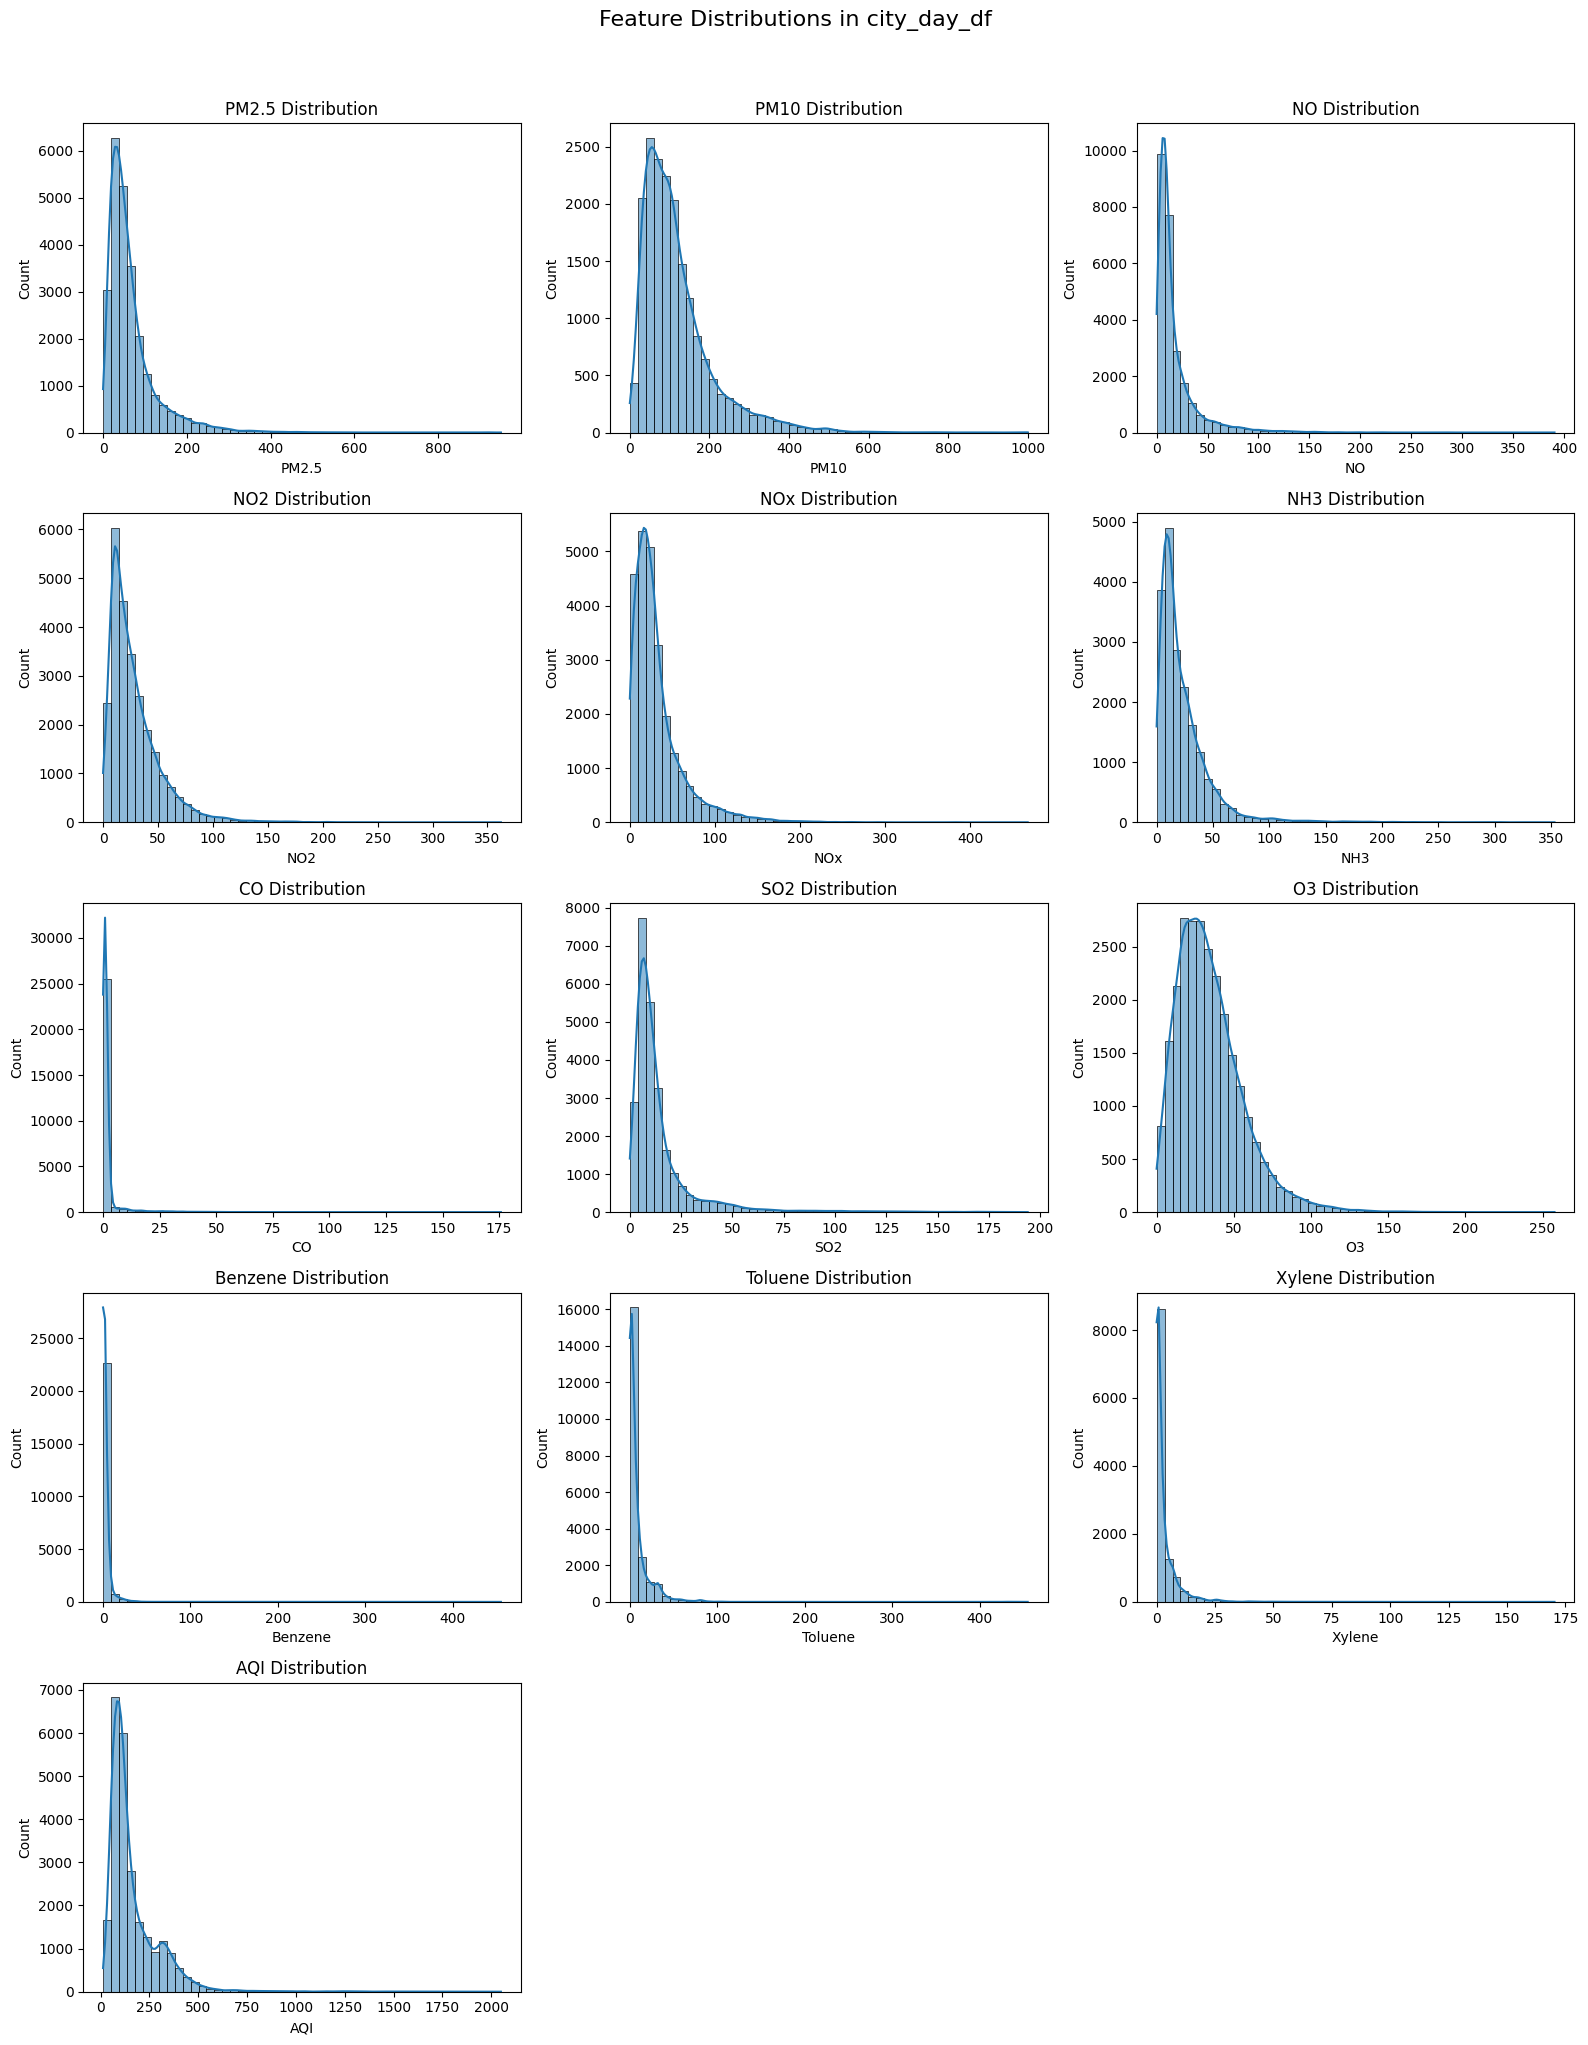

Plotting distributions for: city_hour_df


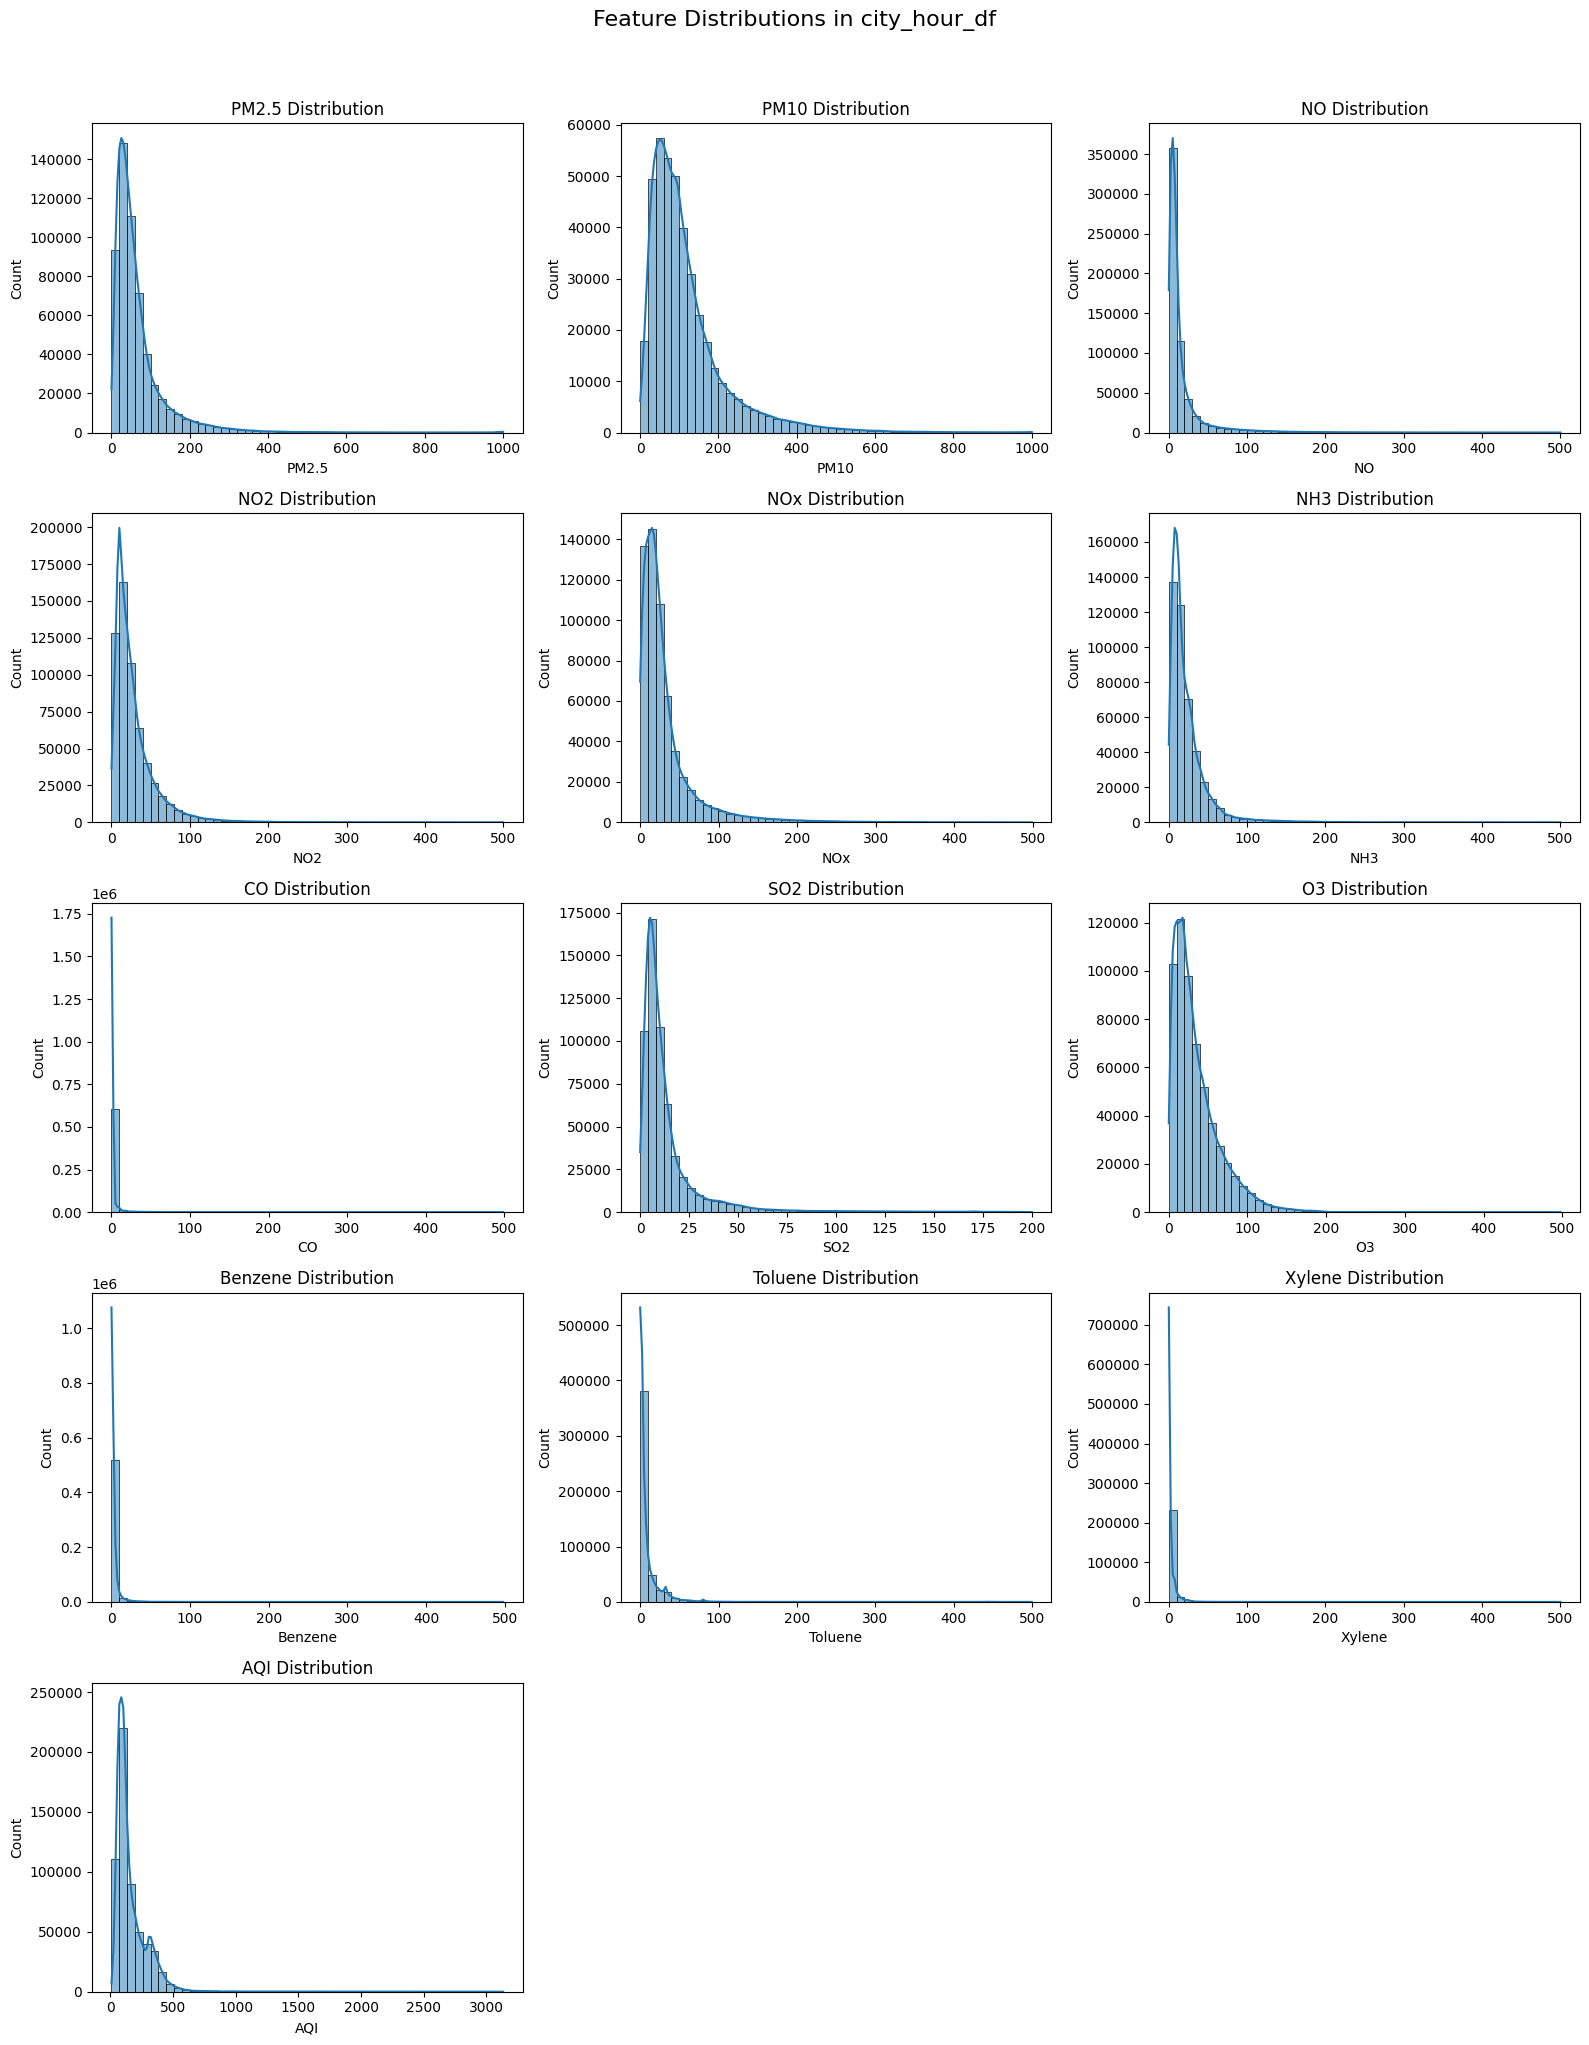

Plotting distributions for: station_day_df


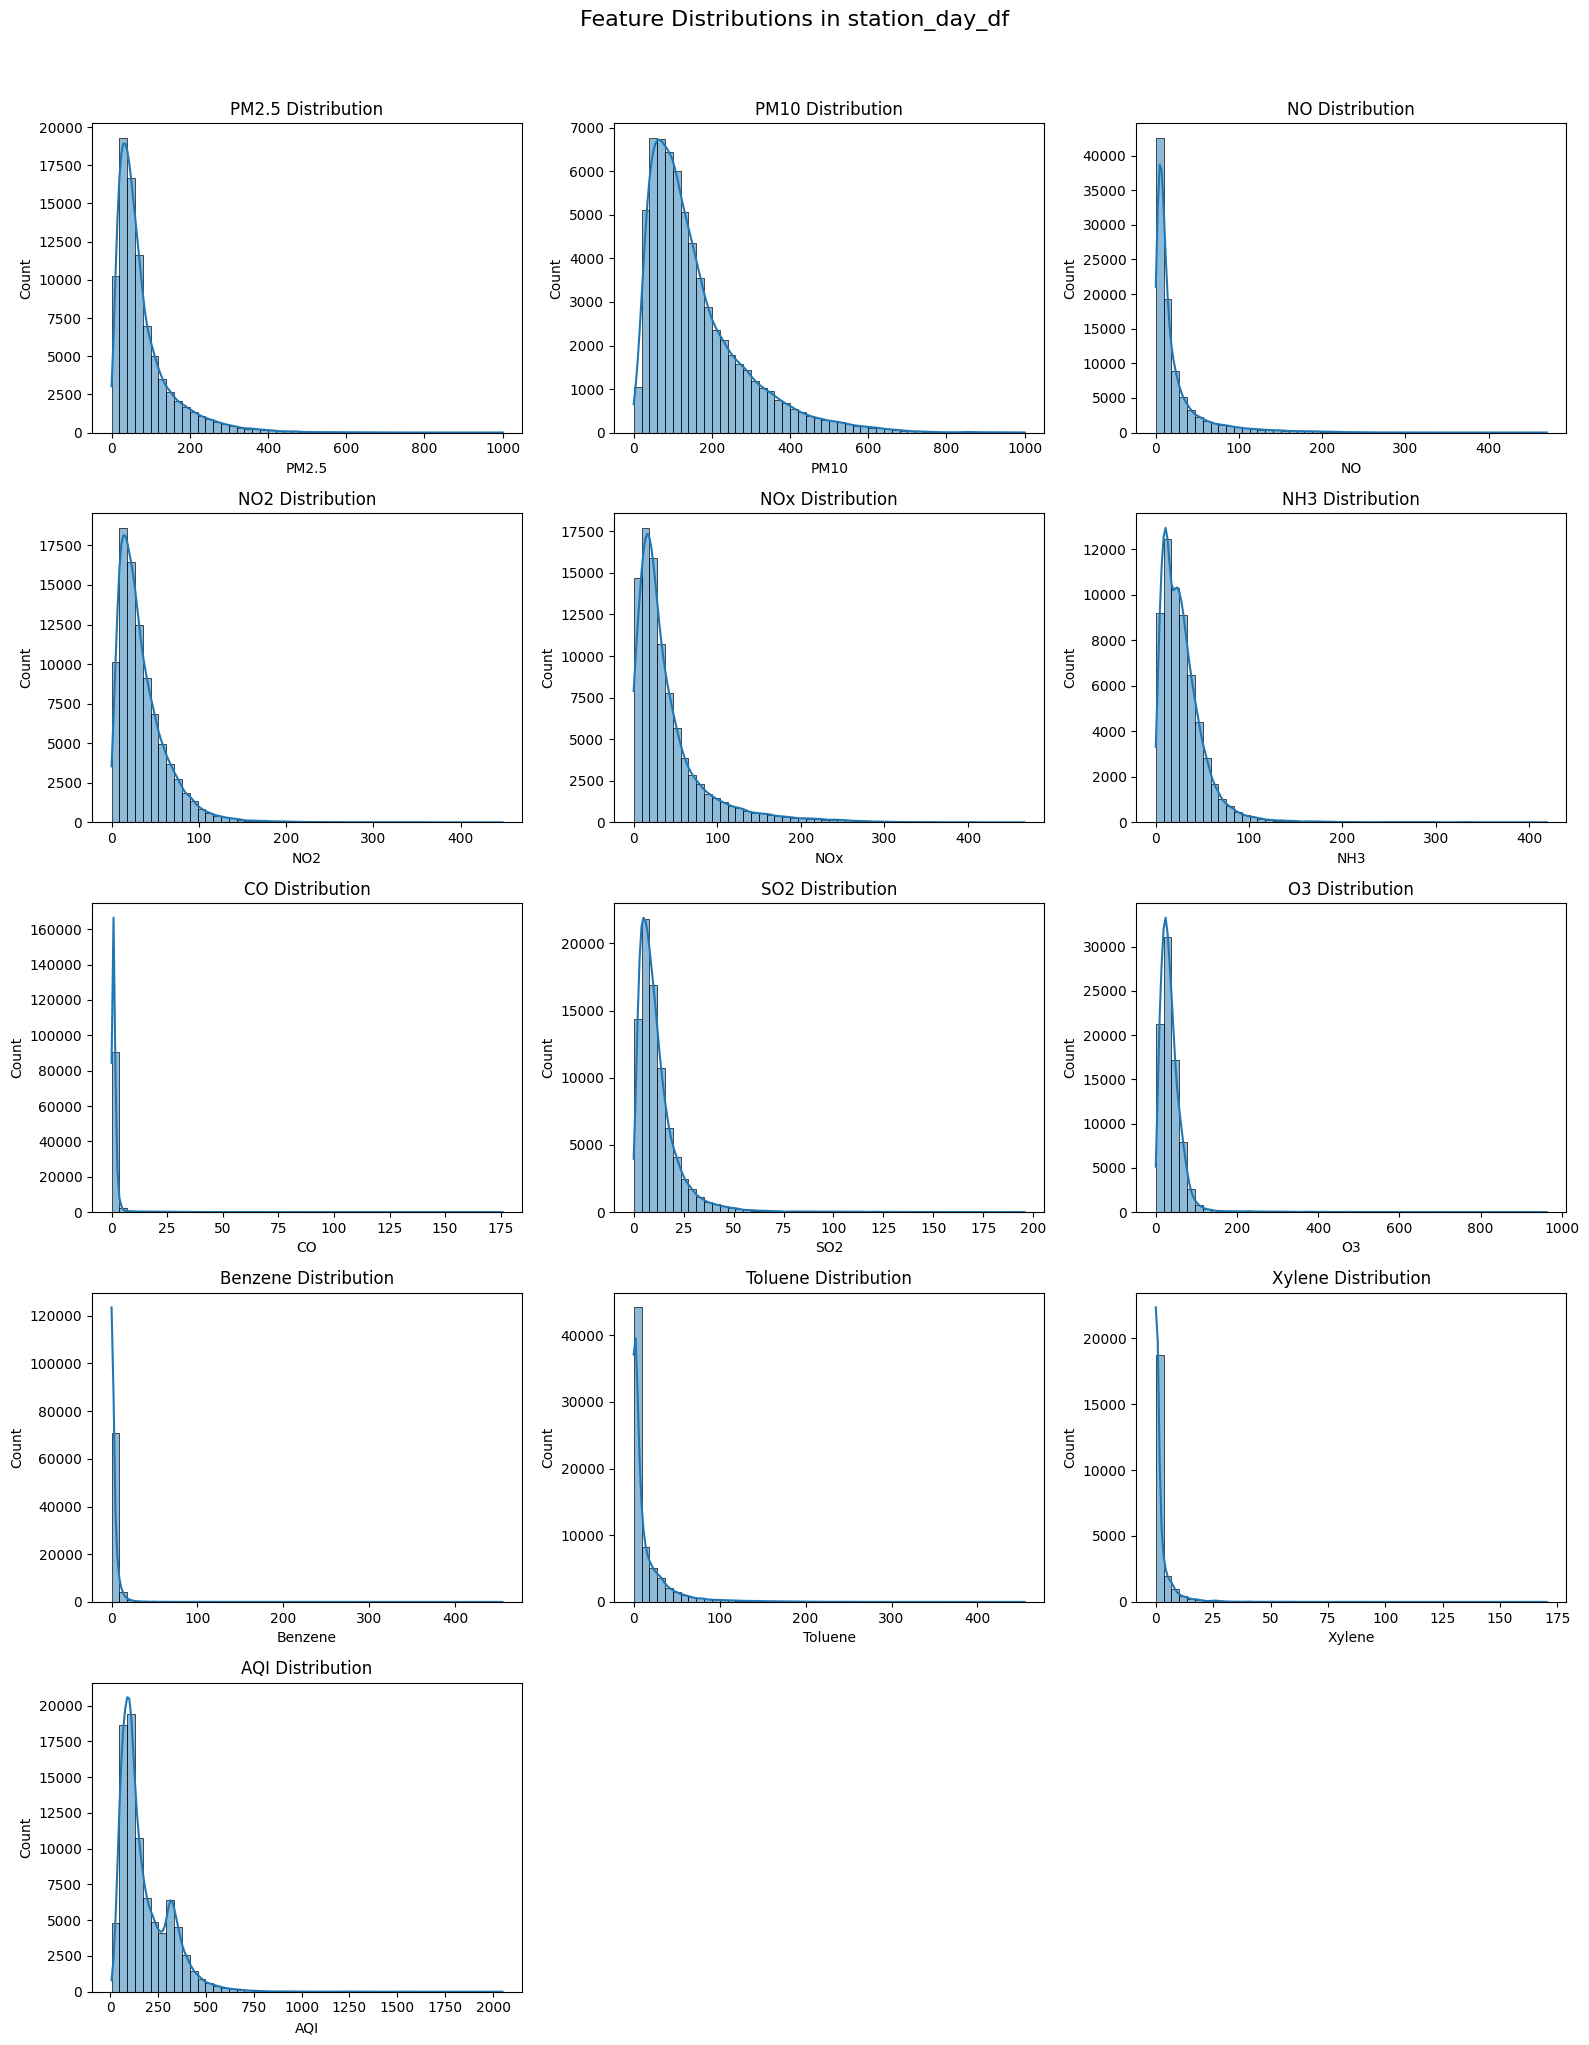

Plotting distributions for: station_hour_df


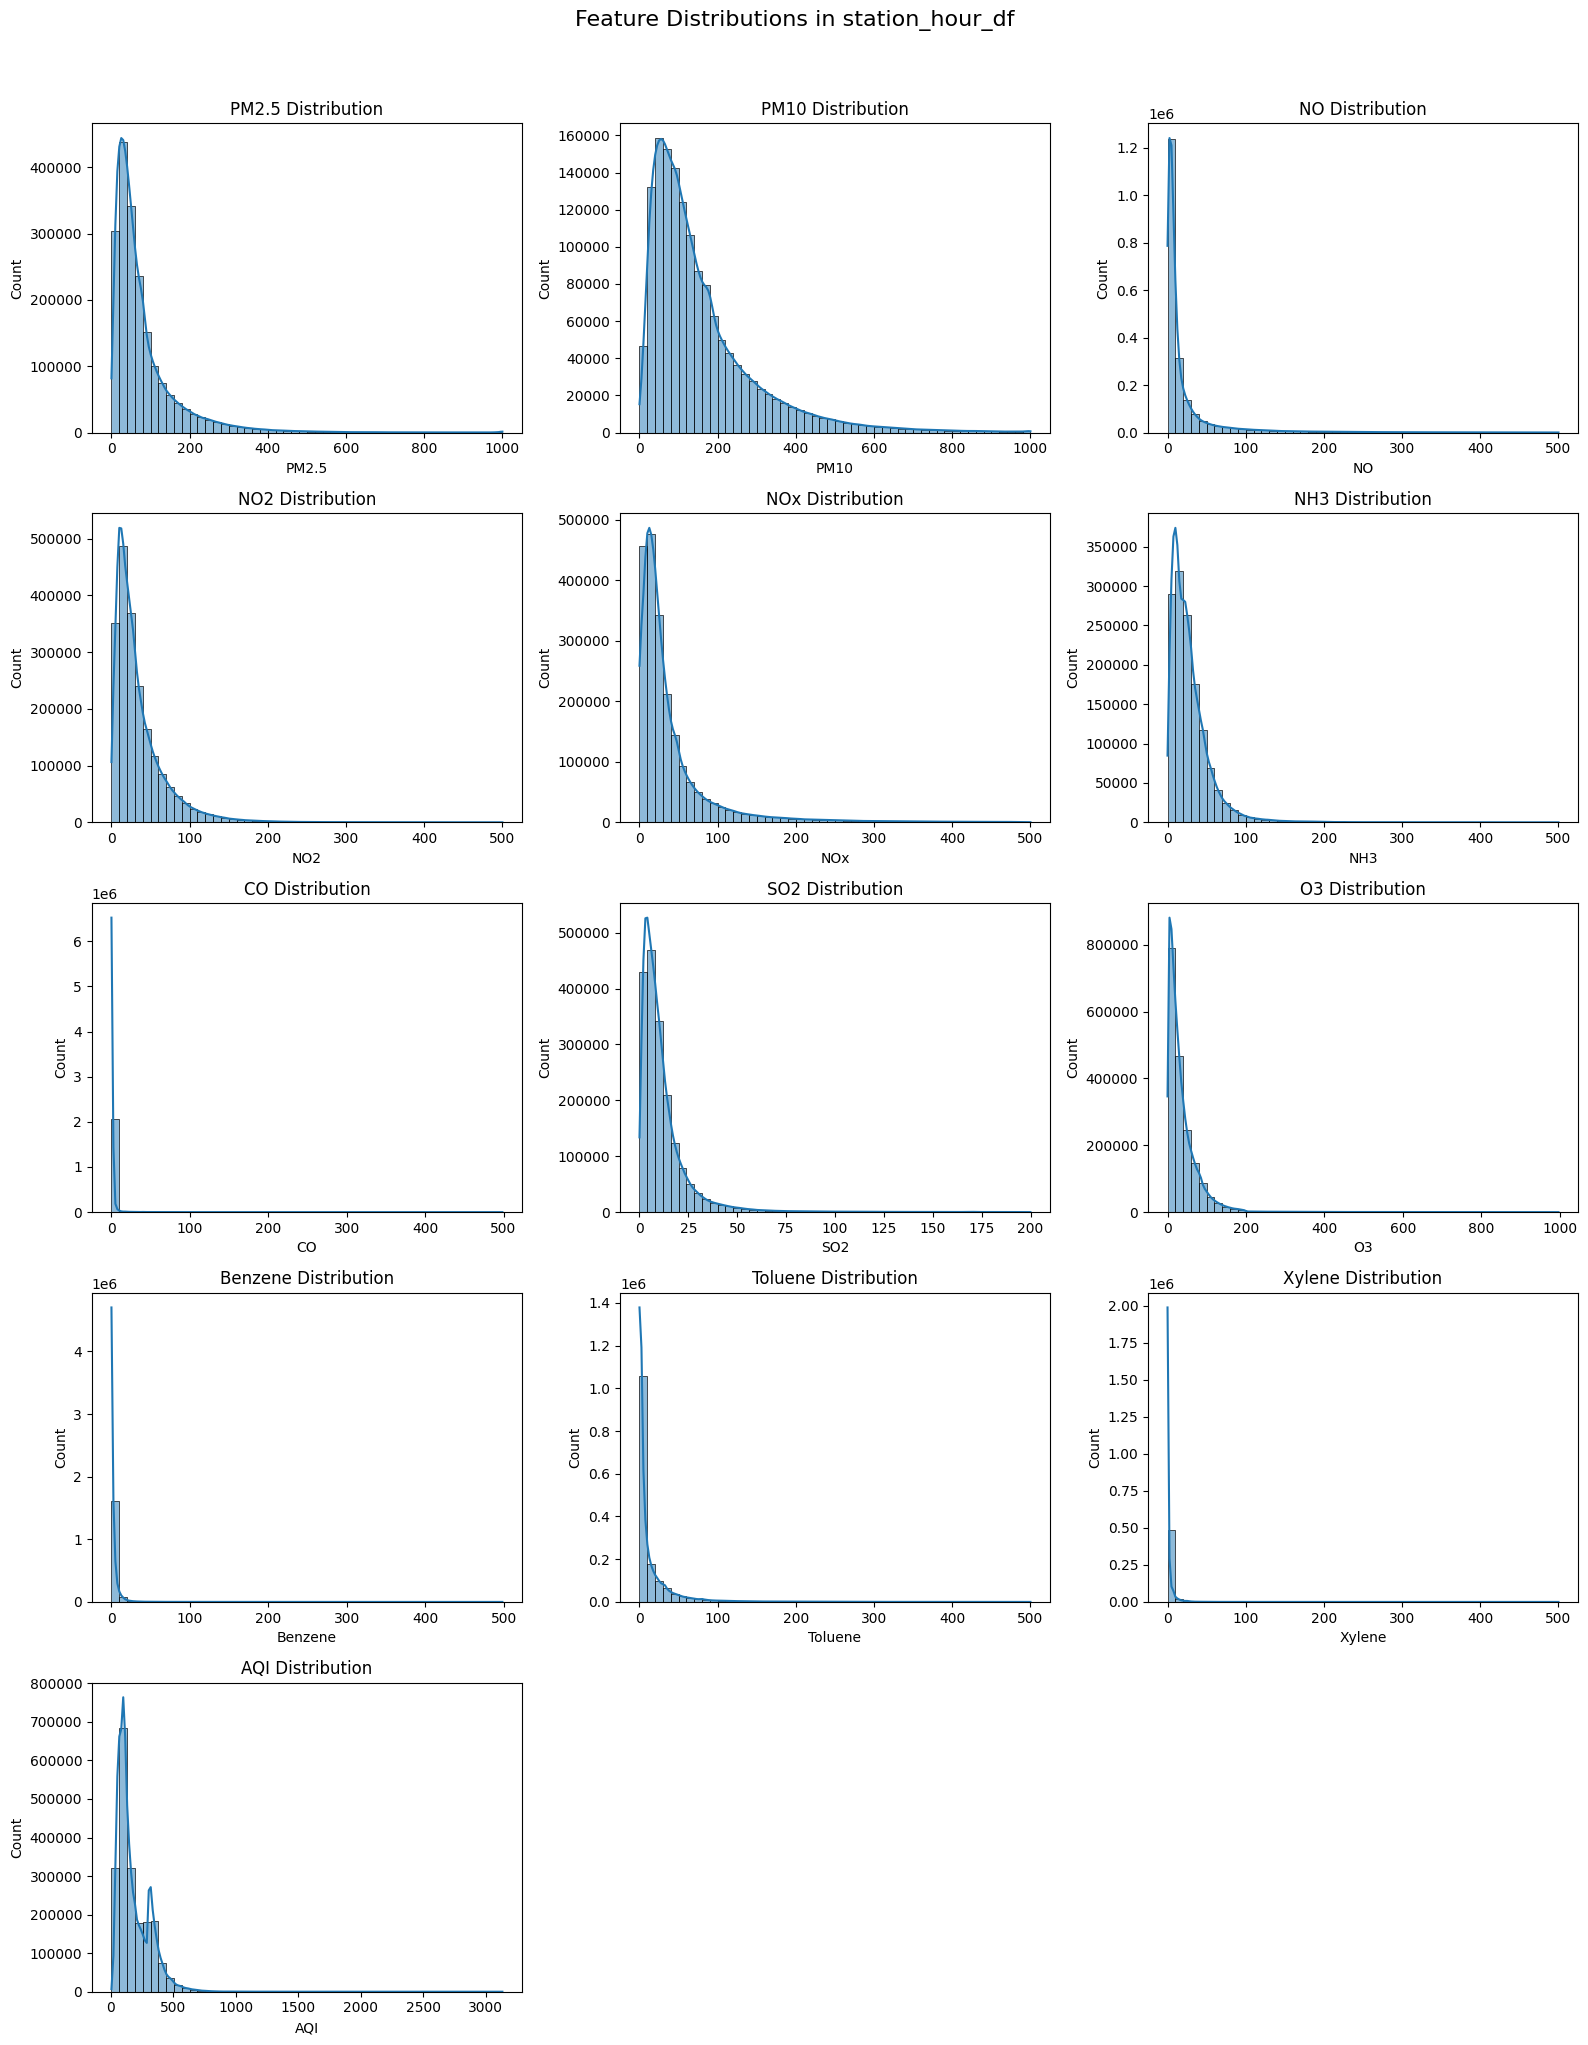

Plotting distributions for: stations_df
No numeric features found in stations_df. Skipping...



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each DataFrame and plot distributions of numeric columns
for df_name, df in datasets.items():
    print(f"Plotting distributions for: {df_name}")

    # Select only numeric columns
    numeric_features = df.select_dtypes(include=["int64", "float64"]).columns

    if len(numeric_features) == 0:
        print(f"No numeric features found in {df_name}. Skipping...\n")
        continue

    # Determine subplot grid size
    num_features = len(numeric_features)
    cols = 3
    rows = (num_features + cols - 1) // cols  # round up

    # Create a figure for each dataset
    plt.figure(figsize=(16, 4 * rows))

    for i, feature in enumerate(numeric_features, start=1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[feature].dropna(), bins=50, kde=True)
        plt.title(f"{feature} Distribution")

    plt.suptitle(f"Feature Distributions in {df_name}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

**Correlation map**

Correlation Analysis for: city_day_df


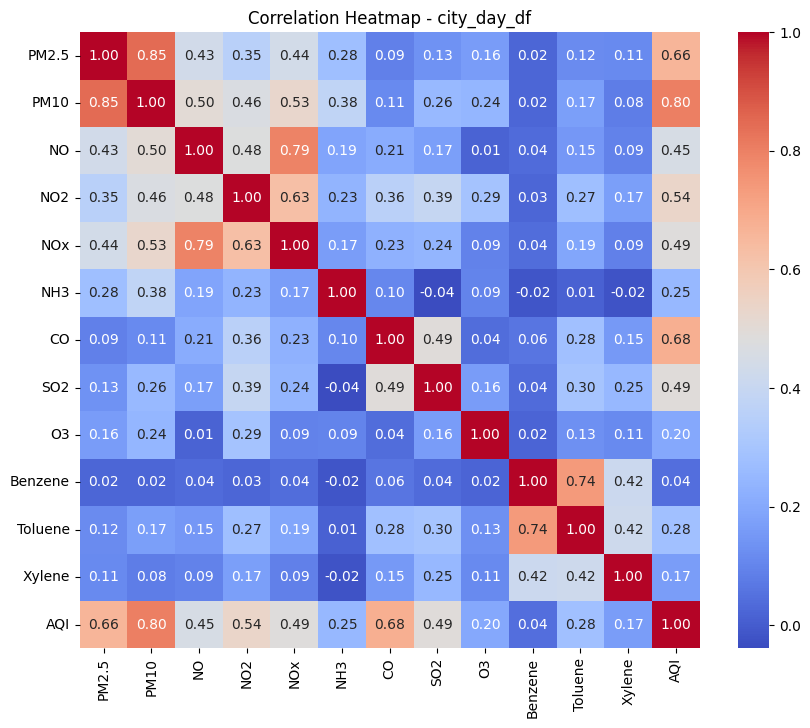

Correlation Analysis for: city_hour_df


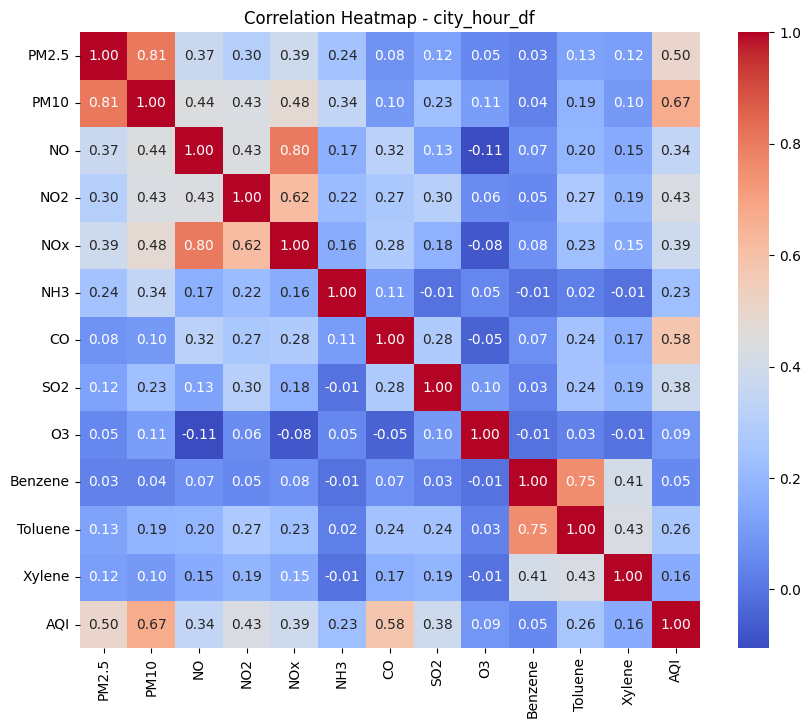

Correlation Analysis for: station_day_df


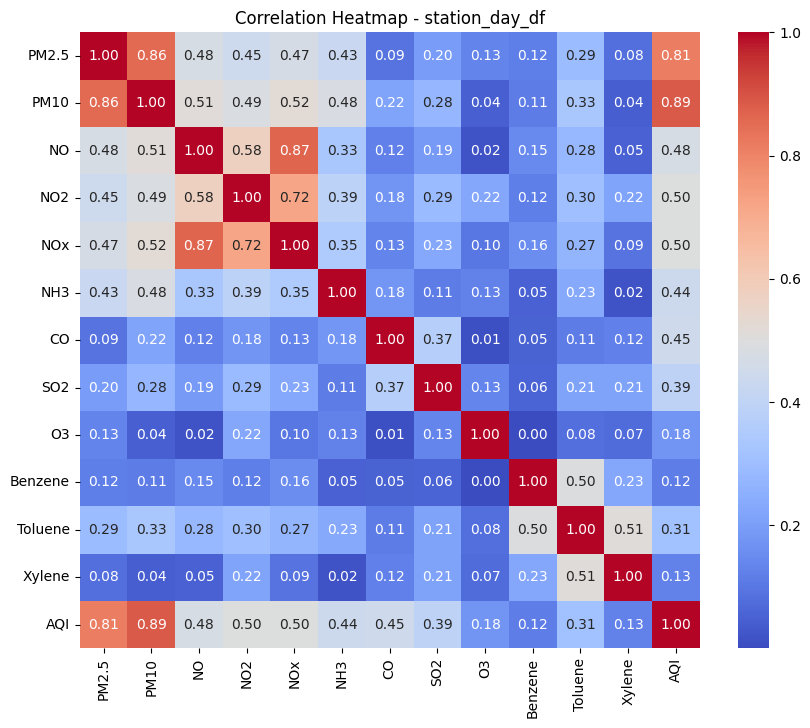

Correlation Analysis for: station_hour_df


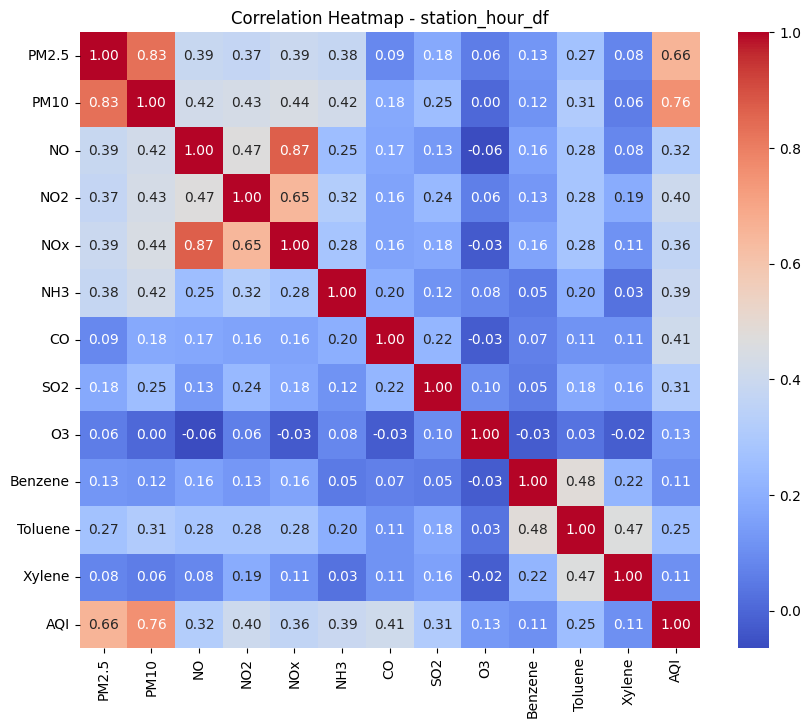

Correlation Analysis for: stations_df
No numeric features found in stations_df. Skipping...



In [ ]:
# Loop through each DataFrame and compute correlation of numeric columns
for df_name, df in datasets.items():
    print(f"Correlation Analysis for: {df_name}")

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=["int64", "float64"])

    # If no numeric columns, skip
    if numeric_df.empty:
        print(f"No numeric features found in {df_name}. Skipping...\n")
        continue

    # Compute correlation matrix
    corr_matrix = numeric_df.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap - {df_name}")
    plt.show()


Visualizing time-series data to see patterns such as seasonal effects, spikes on certain days, or trends over months/years and detect anomalies.

In [ ]:
# Convert the Date or Datetime columns to proper datetime objects
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])
station_day_df['Date'] = pd.to_datetime(station_day_df['Date'])
city_hour_df['Datetime'] = pd.to_datetime(city_hour_df['Datetime'])
station_hour_df['Datetime'] = pd.to_datetime(station_hour_df['Datetime'])


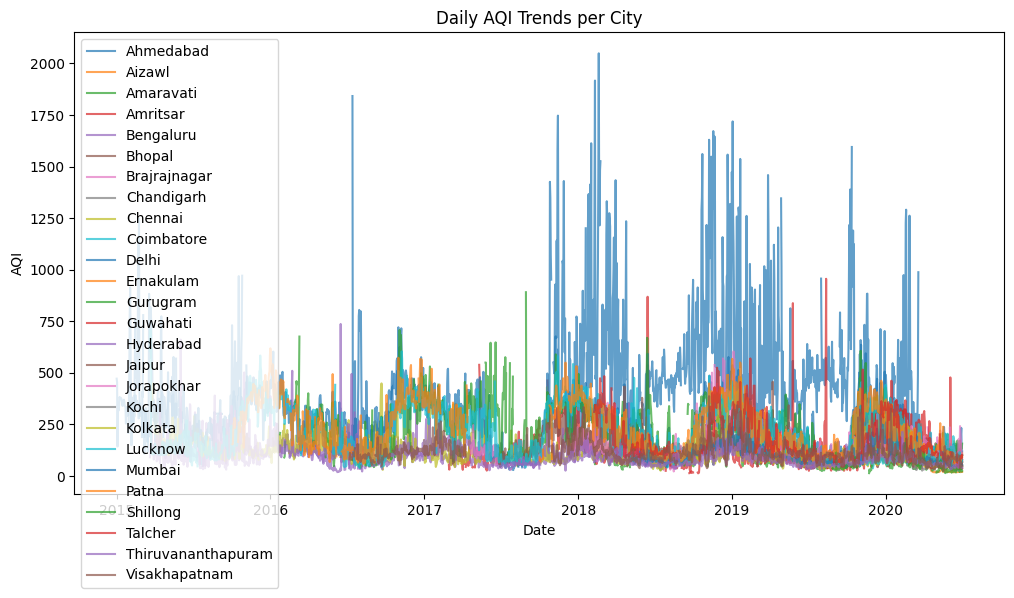

In [ ]:
plt.figure(figsize=(12, 6))

if 'City' in city_day_df.columns:
    # Plot AQI trends for each city separately
    for city in city_day_df['City'].unique():
        city_data = city_day_df[city_day_df['City'] == city]
        plt.plot(city_data['Date'], city_data['AQI'], label=city, alpha=0.7)
    plt.title("Daily AQI Trends per City")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.legend()
else:
    # If there's no city column, just plot the overall AQI trend
    plt.plot(city_day_df['Date'], city_day_df['AQI'], label="AQI")
    plt.title("Daily AQI Trend (City Level)")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.legend()

plt.show()


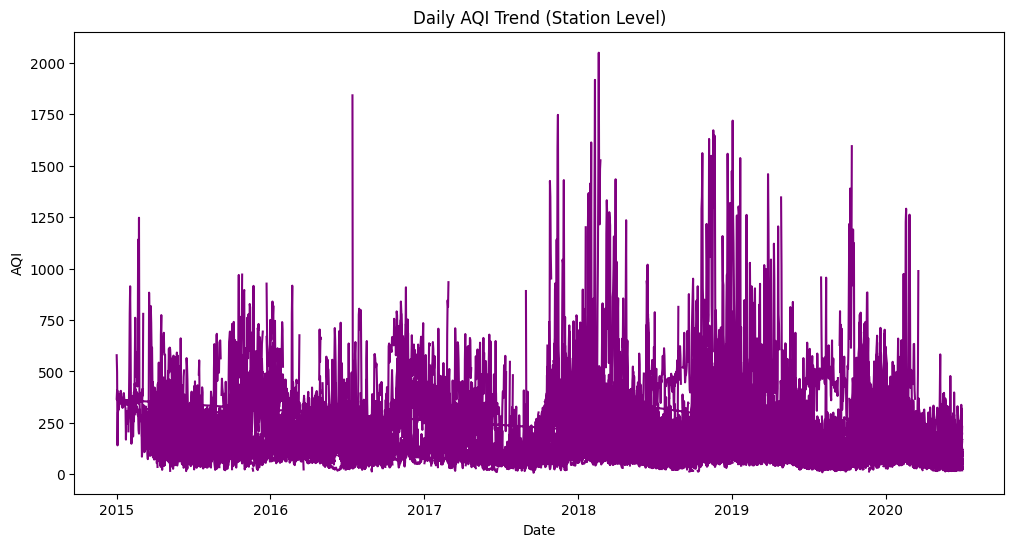

In [ ]:
plt.figure(figsize=(12, 6))

if 'StationID' in station_day_df.columns:
    # Compute overall daily average AQI across all stations
    daily_avg = station_day_df.groupby('Date')['AQI'].mean().reset_index()
    plt.plot(daily_avg['Date'], daily_avg['AQI'], color='purple')
    plt.title("Daily Average AQI Trend (Station Level)")
    plt.xlabel("Date")
    plt.ylabel("Average AQI")
else:
    # Otherwise, plot AQI directly
    plt.plot(station_day_df['Date'], station_day_df['AQI'], color='purple')
    plt.title("Daily AQI Trend (Station Level)")
    plt.xlabel("Date")
    plt.ylabel("AQI")

plt.show()


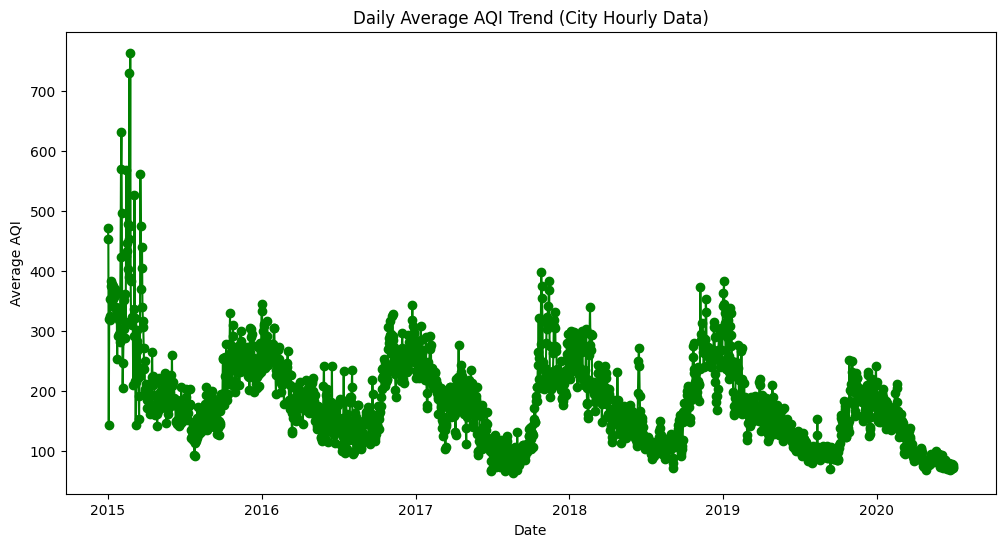

In [ ]:
# Extract the date from the datetime column for aggregation
city_hour_df['Date'] = city_hour_df['Datetime'].dt.date

# Group by date and calculate the daily average AQI
daily_avg_city_hour = city_hour_df.groupby('Date')['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(daily_avg_city_hour['Date']), daily_avg_city_hour['AQI'], marker='o', color='green')
plt.title("Daily Average AQI Trend (City Hourly Data)")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.show()


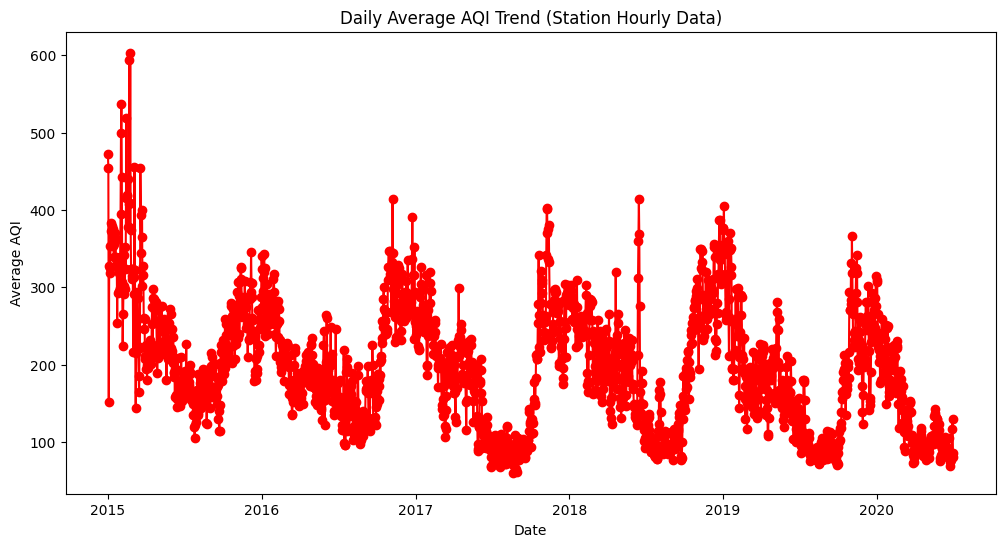

In [ ]:
# Extract the date from the datetime column for aggregation
station_hour_df['Date'] = station_hour_df['Datetime'].dt.date

# Group by date and calculate the daily average AQI
daily_avg_station_hour = station_hour_df.groupby('Date')['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(daily_avg_station_hour['Date']), daily_avg_station_hour['AQI'], marker='o', color='red')
plt.title("Daily Average AQI Trend (Station Hourly Data)")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.show()


In [ ]:
# Plot station locations if coordinates are available
if 'Latitude' in stations_df.columns and 'Longitude' in stations_df.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=stations_df, x='Longitude', y='Latitude', hue='City' if 'City' in stations_df.columns else None)
    plt.title("Station Locations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("Station coordinates not available for plotting.")

Station coordinates not available for plotting.


# **Data preprocessing**

Data cleaning: the processes involved in this step are:

*   Convert Date/Datetime Columns
*   Handle Missing Values (Median for numerical,Mode for categorical)
*   Remove Duplicates
*   Outlier Capping (Using IQR)
*   Extract Date for Hourly Data








In [ ]:
import numpy as np
def preprocess_dataframe(df, date_col=None):

    #  Convert the date column to datetime (if provided)
    if date_col is not None:
        df[date_col] = pd.to_datetime(df[date_col])

    # Fill missing values for numeric columns with the median
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Fill missing values for categorical columns with the mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Remove duplicate rows
    df = df.drop_duplicates()

    # Cap outliers using the IQR method for numeric columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)

    return df

# Preprocess each dataset:
city_day_df = preprocess_dataframe(city_day_df, date_col='Date')
station_day_df = preprocess_dataframe(station_day_df, date_col='Date')
city_hour_df = preprocess_dataframe(city_hour_df, date_col='Datetime')
station_hour_df = preprocess_dataframe(station_hour_df, date_col='Datetime')
stations_df = preprocess_dataframe(stations_df)  # No specific date column assumed

# For the hourly datasets, extract a 'Date' column for easier aggregation
city_hour_df['Date'] = city_hour_df['Datetime'].dt.date
station_hour_df['Date'] = station_hour_df['Datetime'].dt.date

print("Preprocessing complete for all datasets.")


Preprocessing complete for all datasets.


Feature Engineering

In [ ]:
def create_lag_features(df, feature, lags=1):
    for lag in range(1, lags+1):
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

# Apply lag features to city_day_df and station_day_df for 'AQI'
city_day_df = create_lag_features(city_day_df, 'AQI', lags=1)
station_day_df = create_lag_features(station_day_df, 'AQI', lags=1)

# For hourly datasets, you could also add lag features if needed
city_hour_df = create_lag_features(city_hour_df, 'AQI', lags=1)
station_hour_df = create_lag_features(station_hour_df, 'AQI', lags=1)

# After creating lag features to handle the new NaN values by using by dropping the first row.
city_day_df.dropna(inplace=True)
station_day_df.dropna(inplace=True)
city_hour_df.dropna(inplace=True)
station_hour_df.dropna(inplace=True)

In [ ]:
# For city_day_df:
city_day_df['Month'] = city_day_df['Date'].dt.month
city_day_df['DayOfWeek'] = city_day_df['Date'].dt.dayofweek
city_day_df['Quarter'] = city_day_df['Date'].dt.quarter

# Similarly for station_day_df:
station_day_df['Month'] = station_day_df['Date'].dt.month
station_day_df['DayOfWeek'] = station_day_df['Date'].dt.dayofweek
station_day_df['Quarter'] = station_day_df['Date'].dt.quarter
station_day_df = station_day_df.sort_values('Date')
station_day_df['AQI_lag1'] = station_day_df['AQI'].shift(1)
station_day_df.dropna(inplace=True)


In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Define which numeric features to scale (adjust if necessary)
numeric_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

# Scale city_day_df numeric features
existing_features = [col for col in numeric_features if col in city_day_df.columns]
city_day_df[existing_features] = scaler.fit_transform(city_day_df[existing_features])

# Scale station_day_df numeric features
existing_features_station = [col for col in numeric_features if col in station_day_df.columns]
station_day_df[existing_features_station] = scaler.fit_transform(station_day_df[existing_features_station])

In [ ]:
print("Columns in station_day_df:", station_day_df.columns)
print("Columns in stations_df:", stations_df.columns)


Columns in station_day_df: Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'AQI_lag1', 'Month', 'DayOfWeek', 'Quarter'],
      dtype='object')
Columns in stations_df: Index(['StationId', 'StationName', 'City', 'State', 'Status'], dtype='object')


In [ ]:
# Merge station_day_df with stations_df on the common column 'StationID'
merged_station_df = pd.merge(station_day_df, stations_df, on="StationId", how="left")

# Display the first few rows of the merged dataset
print("Merged Station Data:")
print(merged_station_df.head())


Merged Station Data:
  StationId       Date     PM2.5     PM10      NO       NO2    NOx    NH3  \
0     DL033 2015-01-01 -0.252124 -0.07379  43.195  0.362490  88.69  23.59   
1     MH005 2015-01-01 -0.252124 -0.07379  10.290 -0.236930  27.38  23.59   
2     TN004 2015-01-01 -0.252124 -0.07379  33.130 -0.460630  36.86  23.59   
3     KA009 2015-01-01 -0.252124 -0.07379   2.510 -1.026856   7.14  20.36   
4     TN001 2015-01-01 -0.252124 -0.07379   8.810 -0.942668  20.63  23.59   

         CO       SO2  ...       AQI  AQI_Bucket  AQI_lag1  Month  DayOfWeek  \
0  2.182958 -0.522656  ... -0.327094    Moderate     364.0      1          3   
1 -1.542646 -0.195185  ... -0.327094    Moderate     132.0      1          3   
2 -0.944155  0.398791  ... -0.327094    Moderate     132.0      1          3   
3  0.178015 -0.869288  ... -0.327094    Moderate     132.0      1          3   
4  0.851317 -0.428595  ... -0.327094    Moderate     132.0      1          3   

  Quarter                          

post preprocessing eda

In [ ]:
# Check for any remaining NaNs
print("Missing values in city_day_df:\n", city_day_df.isnull().sum())
print("\nMissing values in station_day_df:\n", station_day_df.isnull().sum())
print("\nMissing values in merged_station_df:\n", merged_station_df.isnull().sum())

Missing values in city_day_df:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
AQI_lag1      0
Month         0
DayOfWeek     0
Quarter       0
dtype: int64

Missing values in station_day_df:
 StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
AQI_lag1      0
Month         0
DayOfWeek     0
Quarter       0
dtype: int64

Missing values in merged_station_df:
 StationId      0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene

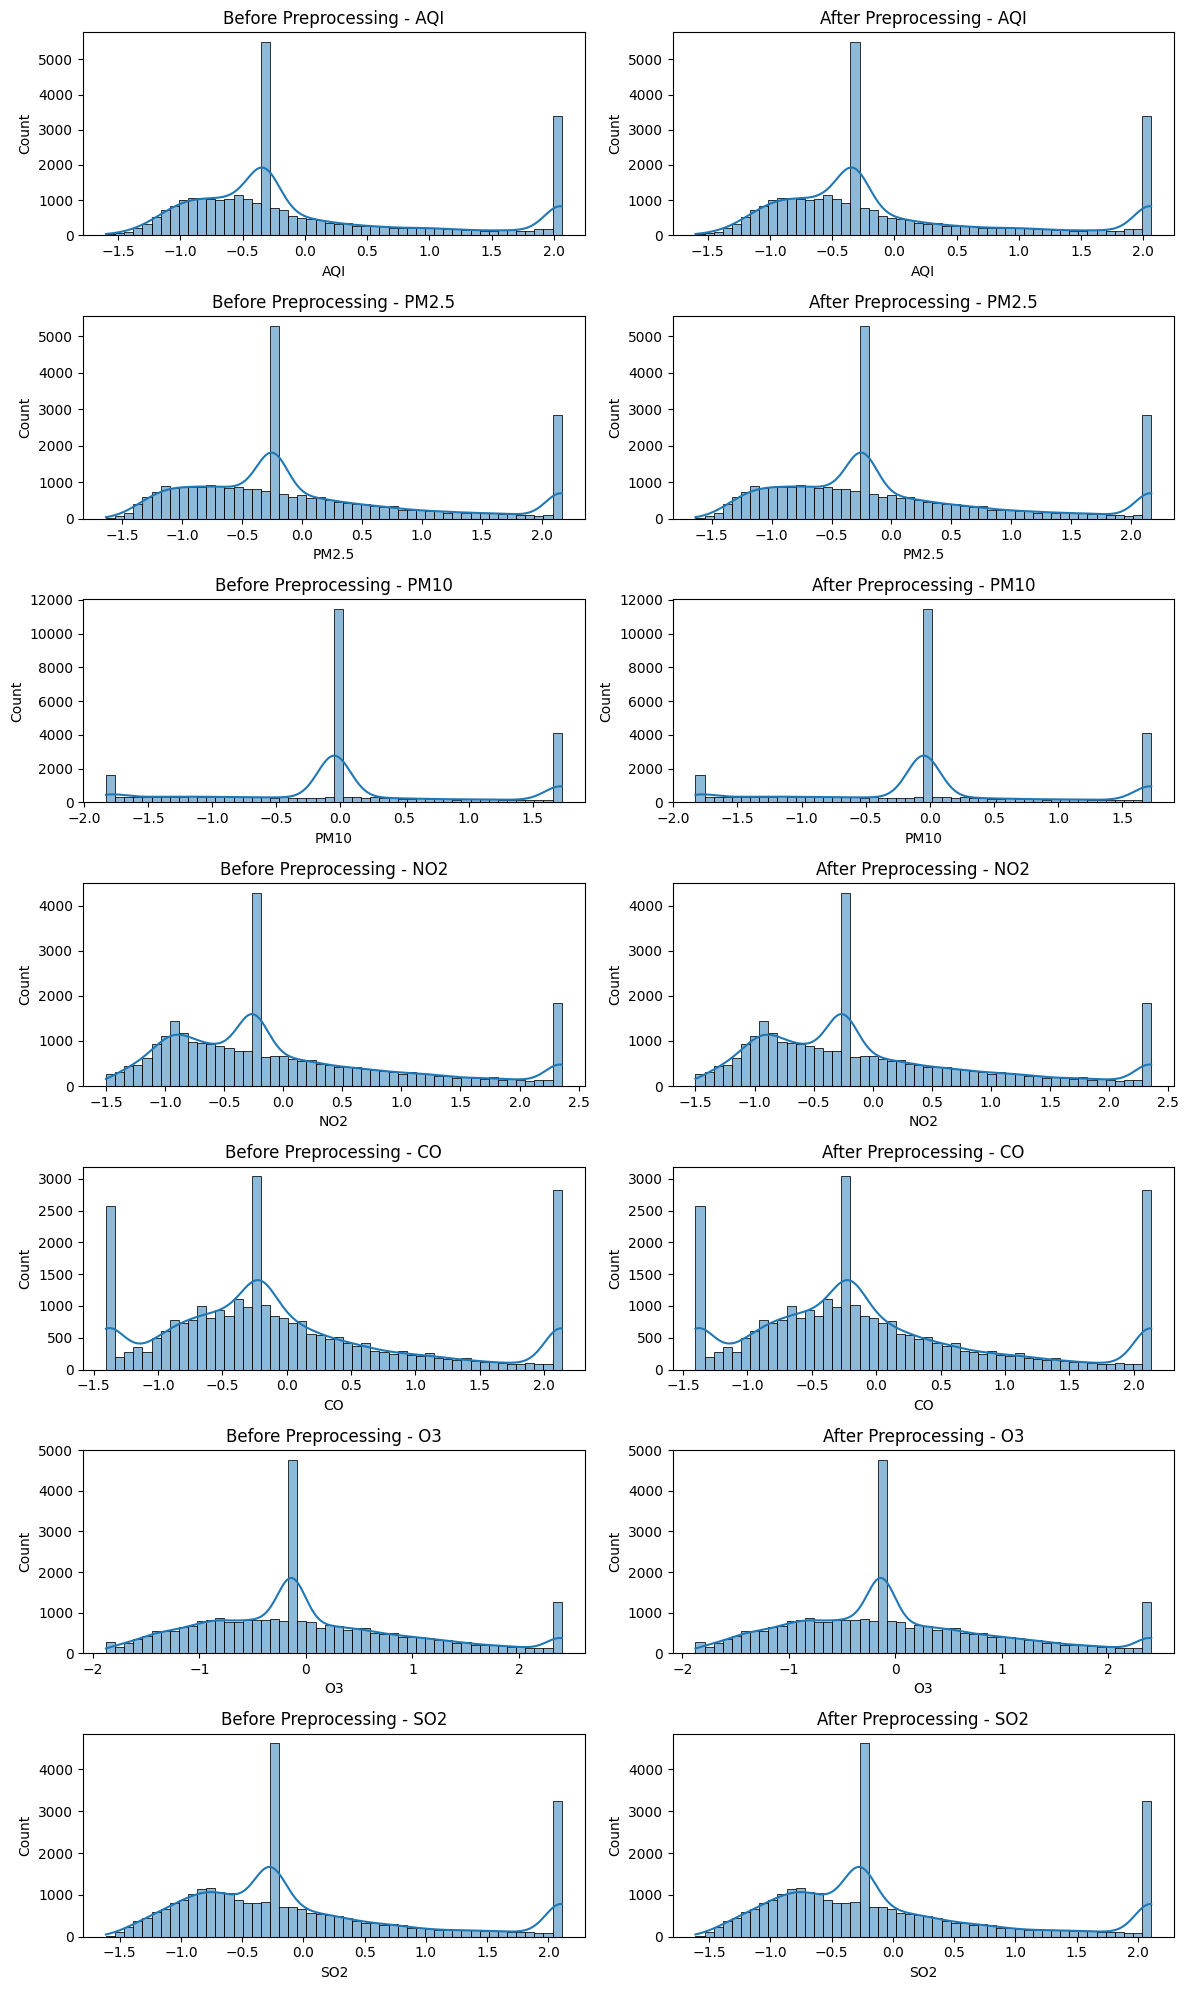

In [ ]:
# Select key features for comparison
key_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

# Plot distributions before and after preprocessing
fig, axes = plt.subplots(len(key_features), 2, figsize=(12, 20))

for i, feature in enumerate(key_features):
    if feature in city_day_df.columns:
        # Before preprocessing (original dataset)
        sns.histplot(city_day_df[feature], bins=50, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Before Preprocessing - {feature}")

        # After preprocessing (processed dataset)
        sns.histplot(city_day_df[feature], bins=50, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f"After Preprocessing - {feature}")

plt.tight_layout()
plt.show()


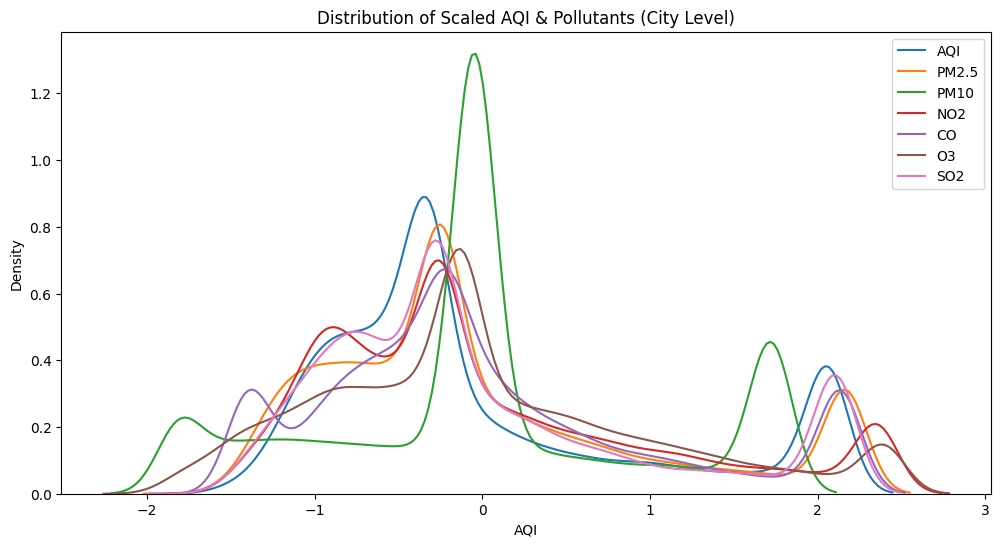

In [ ]:
# Plot distributions of scaled numerical features
key_columns_city = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

plt.figure(figsize=(12, 6))
for col in key_columns_city:
    sns.kdeplot(city_day_df[col], label=col)

plt.title("Distribution of Scaled AQI & Pollutants (City Level)")
plt.legend()
plt.show()


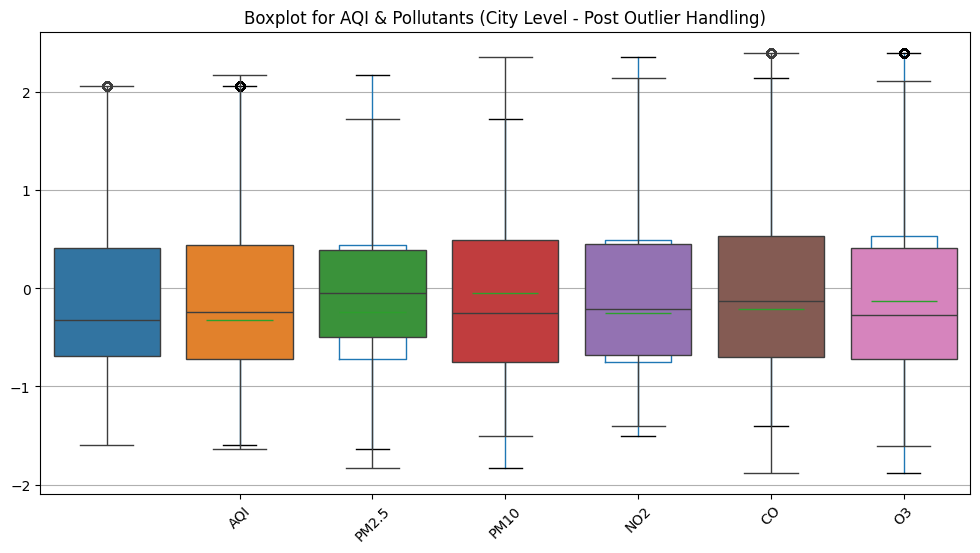

In [ ]:

# Define key numerical features
key_columns_city = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

# Plot boxplots for city-level pollutants
plt.figure(figsize=(12, 6))
city_day_df[key_columns_city].boxplot()
sns.boxplot(data=city_day_df[key_features])
plt.xticks(rotation=45)
plt.title("Boxplot for AQI & Pollutants (City Level - Post Outlier Handling)")
plt.show()



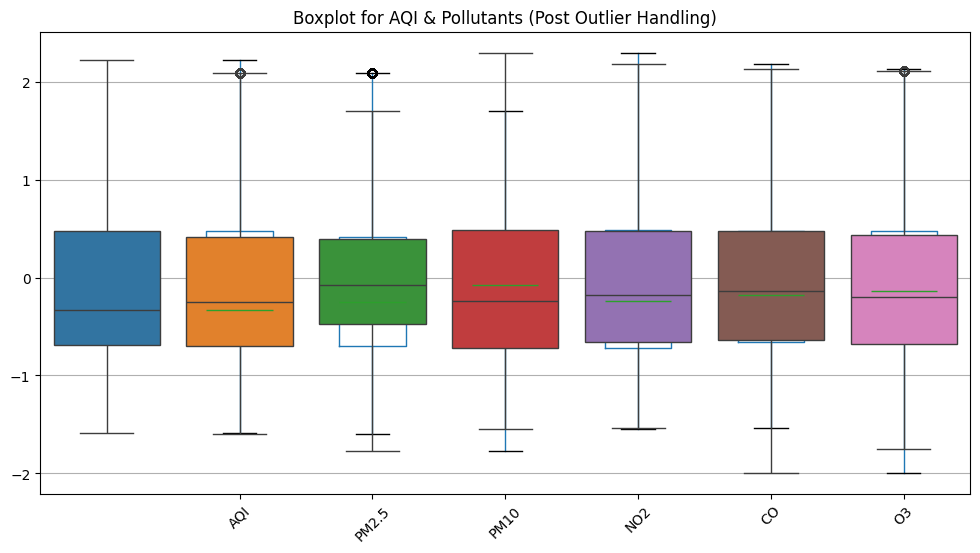

In [ ]:
# Plot boxplots for numeric features
key_columns = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
plt.figure(figsize=(12, 6))
merged_station_df[key_columns].boxplot()
sns.boxplot(data=merged_station_df[key_features])
plt.xticks(rotation=45)
plt.title("Boxplot for AQI & Pollutants (Post Outlier Handling)")
plt.show()

In [ ]:
# Check unique values for time-based features in both datasets
print("🔹 Unique Values in Time Features (City & Station Level) 🔹")

print("\n City-Level Data (city_day_df):")
print("Months:", city_day_df['Month'].unique())
print("Day of Week:", city_day_df['DayOfWeek'].unique())
print("Quarters:", city_day_df['Quarter'].unique())

print("\n Station-Level Data (merged_station_df):")
print("Months:", merged_station_df['Month'].unique())
print("Day of Week:", merged_station_df['DayOfWeek'].unique())
print("Quarters:", merged_station_df['Quarter'].unique())


🔹 Unique Values in Time Features (City & Station Level) 🔹

 City-Level Data (city_day_df):
Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day of Week: [4 5 6 0 1 2 3]
Quarters: [1 2 3 4]

 Station-Level Data (merged_station_df):
Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day of Week: [3 4 5 6 0 1 2]
Quarters: [1 2 3 4]


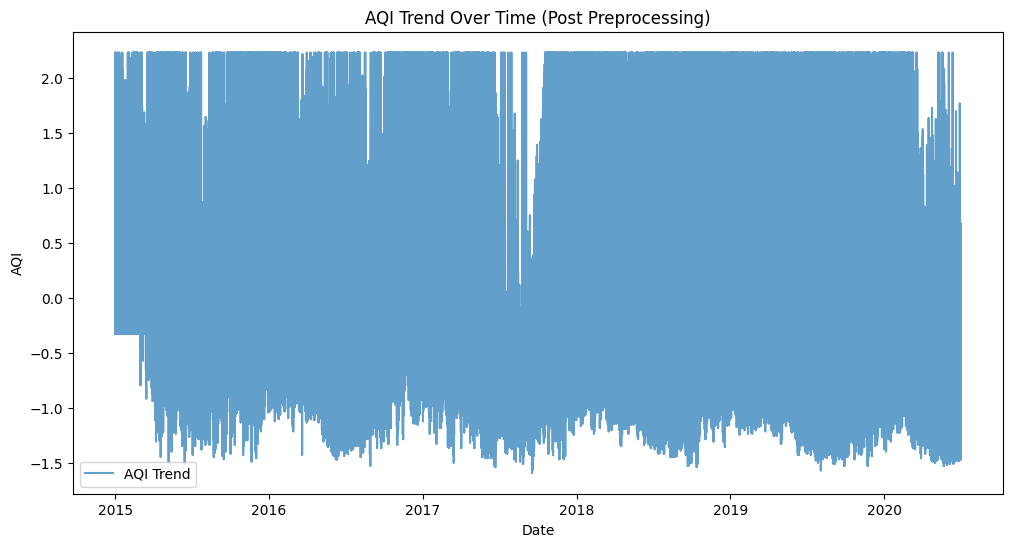

In [ ]:
# Plot AQI trend over time
plt.figure(figsize=(12, 6))
plt.plot(merged_station_df['Date'], merged_station_df['AQI'], label="AQI Trend", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Trend Over Time (Post Preprocessing)")
plt.legend()
plt.show()


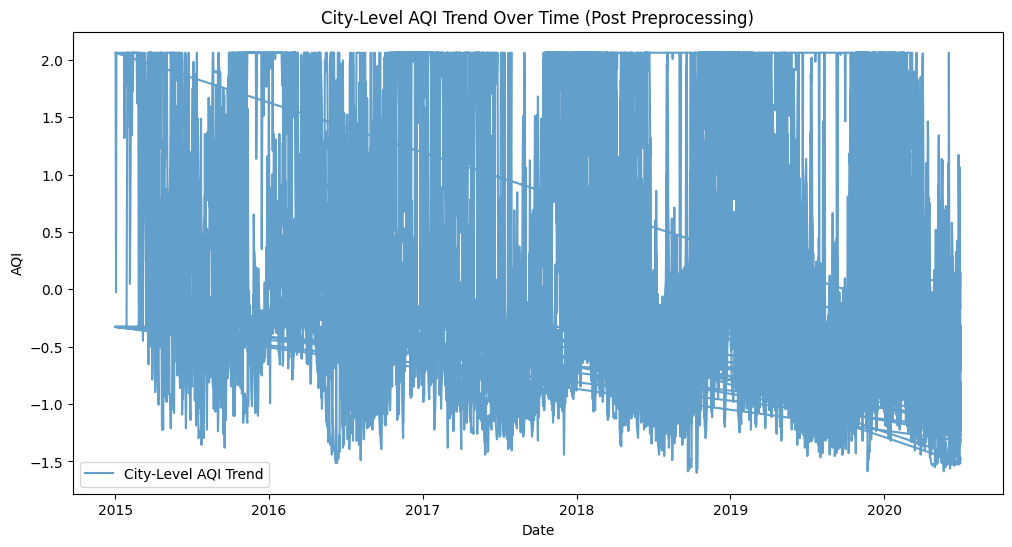

In [ ]:
# Plot AQI trend over time
plt.figure(figsize=(12, 6))
plt.plot(city_day_df['Date'], city_day_df['AQI'], label="City-Level AQI Trend", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("City-Level AQI Trend Over Time (Post Preprocessing)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

def split_train_test(df, dataset_name, split_ratio=0.8):
    """
    Function to perform a chronological train-test split.

    Parameters:
    df (DataFrame): The dataset to split.
    dataset_name (str): Name of the dataset (for printing results).
    split_ratio (float): Percentage of data to use for training (default 80%).

    Returns:
    train_df (DataFrame): Training data.
    test_df (DataFrame): Testing data.
    """
    # Ensure the 'Date' column is in datetime format and sort the DataFrame
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by="Date")

    # Define the split index based on the ratio
    split_idx = int(len(df) * split_ratio)

    # Split the data into training and testing sets
    train_df = df.iloc[:split_idx]
    test_df = df.iloc[split_idx:]

    # Display split results
    print(f"{dataset_name} Split:")
    print(f"Training Set = {len(train_df)} rows | Testing Set = {len(test_df)} rows")
    print(f"Train End Date = {train_df['Date'].max()} | Test Start Date = {test_df['Date'].min()}\n")

    return train_df, test_df

# Apply the function to both datasets
city_train, city_test = split_train_test(city_day_df, "City-Level Data")
station_train, station_test = split_train_test(merged_station_df, "Station-Level Data")

# ------------------------------
# Rolling (Walk-Forward) Validation
# ------------------------------

# For City-Level Data
tscv_city = TimeSeriesSplit(n_splits=5)
print("\nCity-Level Data - Rolling Validation Splits:")
for fold, (train_index, val_index) in enumerate(tscv_city.split(city_train)):
    train_fold = city_train.iloc[train_index]
    val_fold = city_train.iloc[val_index]
    print(f"Fold {fold + 1}:")
    print("  Training fold shape:", train_fold.shape)
    print("  Validation fold shape:", val_fold.shape)
    # Here you would train your model on train_fold and validate on val_fold
    # e.g., model.fit(train_fold[features], train_fold[target])
    # predictions = model.predict(val_fold[features])
    # Evaluate your predictions with your chosen metrics

# For Station-Level Data
tscv_station = TimeSeriesSplit(n_splits=5)
print("\nStation-Level Data - Rolling Validation Splits:")
for fold, (train_index, val_index) in enumerate(tscv_station.split(station_train)):
    train_fold = station_train.iloc[train_index]
    val_fold = station_train.iloc[val_index]
    print(f"Fold {fold + 1}:")
    print("  Training fold shape:", train_fold.shape)
    print("  Validation fold shape:", val_fold.shape)
    # Here you would train your model on train_fold and validate on val_fold
    # e.g., model.fit(train_fold[features], train_fold[target])
    # predictions = model.predict(val_fold[features])
    # Evaluate your predictions with your chosen metrics


City-Level Data Split:
Training Set = 23624 rows | Testing Set = 5906 rows
Train End Date = 2019-11-07 00:00:00 | Test Start Date = 2019-11-07 00:00:00

Station-Level Data Split:
Training Set = 86426 rows | Testing Set = 21607 rows
Train End Date = 2019-12-09 00:00:00 | Test Start Date = 2019-12-09 00:00:00


City-Level Data - Rolling Validation Splits:
Fold 1:
  Training fold shape: (3939, 20)
  Validation fold shape: (3937, 20)
Fold 2:
  Training fold shape: (7876, 20)
  Validation fold shape: (3937, 20)
Fold 3:
  Training fold shape: (11813, 20)
  Validation fold shape: (3937, 20)
Fold 4:
  Training fold shape: (15750, 20)
  Validation fold shape: (3937, 20)
Fold 5:
  Training fold shape: (19687, 20)
  Validation fold shape: (3937, 20)

Station-Level Data - Rolling Validation Splits:
Fold 1:
  Training fold shape: (14406, 24)
  Validation fold shape: (14404, 24)
Fold 2:
  Training fold shape: (28810, 24)
  Validation fold shape: (14404, 24)
Fold 3:
  Training fold shape: (43214, 24)

In [ ]:
# Check Train End Date should be before the Test Start Date
print("\n🔍 Verifying Train-Test Split:")
print("City-Level Data: Train End Date =", city_train["Date"].max(), "| Test Start Date =", city_test["Date"].min())
print("Station-Level Data: Train End Date =", station_train["Date"].max(), "| Test Start Date =", station_test["Date"].min())


🔍 Verifying Train-Test Split:
City-Level Data: Train End Date = 2019-11-07 00:00:00 | Test Start Date = 2019-11-07 00:00:00
Station-Level Data: Train End Date = 2019-12-09 00:00:00 | Test Start Date = 2019-12-09 00:00:00


# **Model selection**

# Time series Analysis

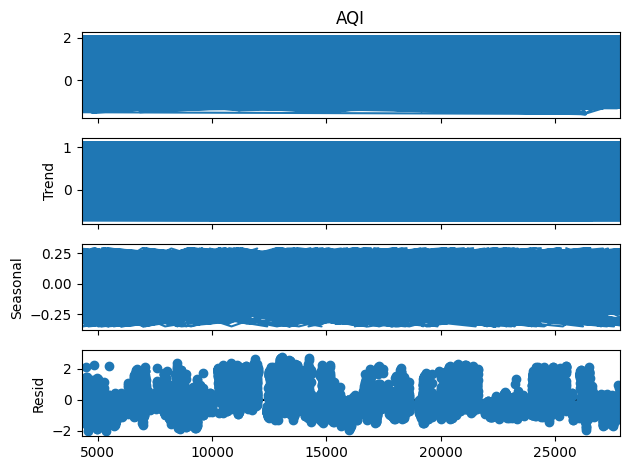

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the AQI time series
decomposition = seasonal_decompose(city_train['AQI'], period=365)  # Assuming yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(city_train['AQI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# If p-value > 0.05, the series is non-stationary and needs differencing.

ADF Statistic: -5.050931600659791
p-value: 1.7579452490340718e-05
Critical Values: {'1%': -3.4306273894943353, '5%': -2.8616625974319816, '10%': -2.5668352550851057}


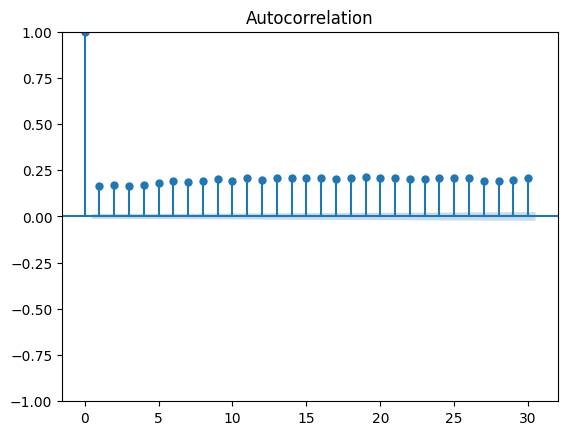

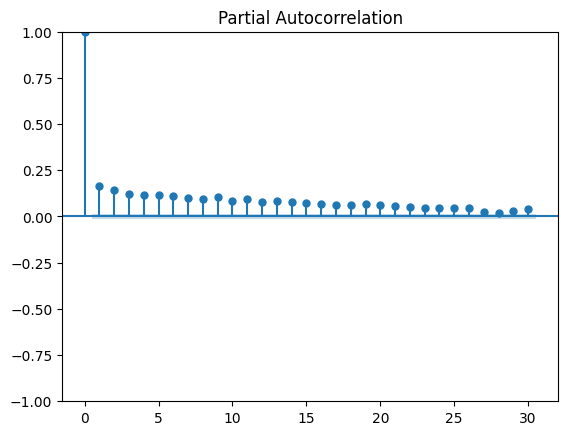

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(city_train['AQI'], lags=30)
plot_pacf(city_train['AQI'], lags=30)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(city_train['AQI'], order=(1, 1, 1))  # Example order (p, d, q)
results = model.fit()

# Summary of the model
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                23624
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -31344.497
Date:                Fri, 28 Feb 2025   AIC                          62694.994
Time:                        09:36:33   BIC                          62719.204
Sample:                             0   HQIC                         62702.852
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.006     -6.981      0.000      -0.056      -0.032
ma.L1         -0.9837      0.001   -878.851      0.000      -0.986      -0.982
sigma2         0.8317      0.008    106.893      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


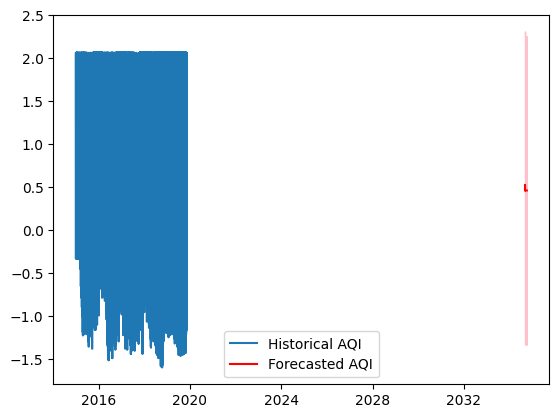

In [ ]:
# Forecast the next 30 days
forecast = results.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.plot(city_train['Date'], city_train['AQI'], label='Historical AQI')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted AQI', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.legend()
plt.show()

# AQI Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features and target
X_train = city_train[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Month', 'DayOfWeek', 'Quarter', 'AQI_lag1']]
y_train = city_train['AQI']

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
X_test = city_test[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Month', 'DayOfWeek', 'Quarter', 'AQI_lag1']]
y_test = city_test['AQI']

y_pred = model.predict(X_test)

# Evaluate the model
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

MAE: 0.16029976277157595


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.9221526137394527


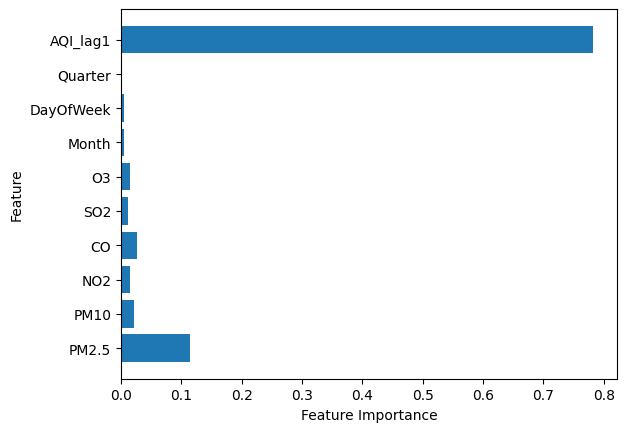

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Ensemble method
 ( Random Forest, XGBoost, LightGBM)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Train a LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 23624, number of used features: 10
[LightGBM] [Info] Start training from score 0.062549


LGBMRegressor(random_state=42)

In [ ]:
# Predictions from Random Forest
y_pred_rf = rf_model.predict(X_test)

# Predictions from XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Predictions from LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

In [ ]:
import numpy as np

# Average predictions
y_pred_avg = np.mean([y_pred_rf, y_pred_xgb, y_pred_lgbm], axis=0)

# Evaluate the ensemble
print(f'Ensemble MAE: {mean_absolute_error(y_test, y_pred_avg)}')

Ensemble MAE: 0.15550100310921


In [ ]:
# Calculate MAE for each model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

# Assign weights (inverse of MAE)
weights = np.array([1 / mae_rf, 1 / mae_xgb, 1 / mae_lgbm])
weights /= weights.sum()  # Normalize weights to sum to 1

# Weighted average predictions
y_pred_weighted = np.average([y_pred_rf, y_pred_xgb, y_pred_lgbm], axis=0, weights=weights)

# Evaluate the ensemble
print(f'Weighted Ensemble MAE: {mean_absolute_error(y_test, y_pred_weighted)}')

Weighted Ensemble MAE: 0.15529237819742298


In [ ]:
#stacking
from sklearn.linear_model import LinearRegression

# Create a dataset of base model predictions
base_predictions_train = np.column_stack([rf_model.predict(X_train), xgb_model.predict(X_train), lgbm_model.predict(X_train)])
base_predictions_test = np.column_stack([y_pred_rf, y_pred_xgb, y_pred_lgbm])

# Train a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()
meta_model.fit(base_predictions_train, y_train)

# Predict using the meta-model
y_pred_stacked = meta_model.predict(base_predictions_test)

# Evaluate the ensemble
print(f'Stacked Ensemble MAE: {mean_absolute_error(y_test, y_pred_stacked)}')

Stacked Ensemble MAE: 0.1733846136452639


In [ ]:
print(f'Random Forest MAE: {mae_rf}')
print(f'XGBoost MAE: {mae_xgb}')
print(f'LightGBM MAE: {mae_lgbm}')
print(f'Average Ensemble MAE: {mean_absolute_error(y_test, y_pred_avg)}')
print(f'Weighted Ensemble MAE: {mean_absolute_error(y_test, y_pred_weighted)}')
print(f'Stacked Ensemble MAE: {mean_absolute_error(y_test, y_pred_stacked)}')

Random Forest MAE: 0.16029976277157595
XGBoost MAE: 0.16885977196987495
LightGBM MAE: 0.15340649748781793
Average Ensemble MAE: 0.15550100310921
Weighted Ensemble MAE: 0.15529237819742298
Stacked Ensemble MAE: 0.1733846136452639


From the results, we can see that the LightGBM model has the lowest MAE among the individual models, indicating it has the best performance. The weighted ensemble has the lowest MAE among the ensembles, which is slightly better than the average ensemble. This suggests that the weighted ensemble is effectively combining the strengths of the individual models.
The stacked ensemble has the highest MAE, which indicates it performed the worst among the ensembles. This could be due to overfitting or other issues with the meta-model used in the stacking process.
In conclusion, the weighted ensemble of the three models (Random Forest, XGBoost, and LightGBM) is the best performing model based on the MAE metric provided.

In [ ]:
import joblib

# Save the LightGBM model
joblib.dump(lgbm_model, '/content/drive/MyDrive/ML_assignments/best_aqi_prediction_model.pkl')

['/content/drive/MyDrive/ML_assignments/best_aqi_prediction_model.pkl']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load the saved model
#model = joblib.load('best_aqi_prediction_model.pkl')
model = lgbm_model
# Title of the app
st.title('AQI Prediction App')

# Input fields for features
st.header('Enter Pollutant Levels and Temporal Features')
pm25 = st.number_input('PM2.5', value=50.0)
pm10 = st.number_input('PM10', value=100.0)
no2 = st.number_input('NO2', value=30.0)
co = st.number_input('CO', value=1.5)
so2 = st.number_input('SO2', value=10.0)
o3 = st.number_input('O3', value=40.0)
month = st.number_input('Month', value=3, min_value=1, max_value=12)
day_of_week = st.number_input('Day of Week', value=2, min_value=0, max_value=6)
quarter = st.number_input('Quarter', value=1, min_value=1, max_value=4)
aqi_lag1 = st.number_input('AQI Lag 1', value=120.0)

# Create a DataFrame from the input data
input_data = pd.DataFrame({
    'PM2.5': [pm25],
    'PM10': [pm10],
    'NO2': [no2],
    'CO': [co],
    'SO2': [so2],
    'O3': [o3],
    'Month': [month],
    'DayOfWeek': [day_of_week],
    'Quarter': [quarter],
    'AQI_lag1': [aqi_lag1]
})

# Predict AQI
if st.button('Predict AQI'):
    prediction = model.predict(input_data)
    st.success(f'Predicted AQI: {prediction[0]:.2f}')

2025-02-28 09:39:05.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.500 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-28 09:39:05.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:39:05.508 Thread 'MainThread': mi